# ML Basics, warming up with small data

In [1]:
print(__doc__)

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn import metrics
import pandas as pd
import seaborn as sns
import numpy as np

Automatically created module for IPython interactive environment


### Read poll data

In [5]:
df20 = pd.read_csv(('./Data/MUSA-650-WelcomePoll_2020.csv'))
df20.head()

,Timestamp,Q1_General background in data analysis?,Q2_Hands-on experience in data analysis using Python?,Q3_Experience in programming in general?,Q4_General background in machine learning?,Q5_Hands-on experience in running machine learning applications?,Q6_Which one would you prefer on a Sunday afternoon?,Q7_Hands-on experience in image analysis using satellite images?,Q8_Level of interest in mathematics?,Q9_Level of interest in reading?,Q10_Level of stress about this class?,Q11_Your overall motivation about this class?
0,2020/01/14 5:11:10 PM EST,8,5,4,6,7,Running,5,3,5,7,3
1,2020/01/14 5:15:45 PM EST,8,8,5,5,6,Reading,7,7,6,7,8
2,2020/01/14 10:10:14 PM EST,6,6,6,6,5,Watching a movie,7,7,7,7,7
3,2020/01/15 10:02:48 AM EST,5,3,6,4,4,Watching a movie,3,8,8,5,10
4,2020/01/15 10:03:20 AM EST,6,6,5,4,3,Reading,4,5,4,10,8


In [6]:
df22 = pd.read_csv(('./Data/MUSA-650-WelcomePoll_2022.csv'))
df22.head()

,Timestamp,Q1_General background in data analysis?,Q2_Hands-on experience in data analysis using Python?,Q3_Experience in programming in general?\t,Q4_General background in machine learning?\t,Q5_Hands-on experience in running machine learning applications?\t,Q6_Which one would you prefer on a Sunday afternoon?\t,Q7_Hands-on experience in image analysis using satellite images?\t,Q8_Level of interest in mathematics?\t,Q9_Level of interest in reading?\t,Q10_Level of stress about this class?\t,Q11_Your overall motivation about this class?
0,1/12/2022 12:00:11,7,8,7,3,2,Watching a movie,7,7,7,7,9
1,1/12/2022 12:00:20,7,6,7,5,5,Reading,4,6,8,6,8
2,1/12/2022 12:00:20,6,6,7,6,4,Watching a movie,2,3,3,7,5
3,1/12/2022 12:00:27,8,7,8,6,3,"Coding for the homework, project or just for fun",4,6,9,5,9
4,1/12/2022 12:00:29,3,3,3,3,3,Reading,3,6,8,10,10


### We skip the timestamp for now 

In [8]:
df20 = df20[df20.columns[1:]]
df20.head()

,Q1_General background in data analysis?,Q2_Hands-on experience in data analysis using Python?,Q3_Experience in programming in general?,Q4_General background in machine learning?,Q5_Hands-on experience in running machine learning applications?,Q6_Which one would you prefer on a Sunday afternoon?,Q7_Hands-on experience in image analysis using satellite images?,Q8_Level of interest in mathematics?,Q9_Level of interest in reading?,Q10_Level of stress about this class?,Q11_Your overall motivation about this class?
0,8,5,4,6,7,Running,5,3,5,7,3
1,8,8,5,5,6,Reading,7,7,6,7,8
2,6,6,6,6,5,Watching a movie,7,7,7,7,7
3,5,3,6,4,4,Watching a movie,3,8,8,5,10
4,6,6,5,4,3,Reading,4,5,4,10,8


In [9]:
df22 = df22[df22.columns[1:]]
df22.head()

,Q1_General background in data analysis?,Q2_Hands-on experience in data analysis using Python?,Q3_Experience in programming in general?\t,Q4_General background in machine learning?\t,Q5_Hands-on experience in running machine learning applications?\t,Q6_Which one would you prefer on a Sunday afternoon?\t,Q7_Hands-on experience in image analysis using satellite images?\t,Q8_Level of interest in mathematics?\t,Q9_Level of interest in reading?\t,Q10_Level of stress about this class?\t,Q11_Your overall motivation about this class?
0,7,8,7,3,2,Watching a movie,7,7,7,7,9
1,7,6,7,5,5,Reading,4,6,8,6,8
2,6,6,7,6,4,Watching a movie,2,3,3,7,5
3,8,7,8,6,3,"Coding for the homework, project or just for fun",4,6,9,5,9
4,3,3,3,3,3,Reading,3,6,8,10,10


### Column names

In [11]:
colNames = df20.columns.tolist()
colNames

['Q1_General background in data analysis?',
 'Q2_Hands-on experience in data analysis using Python?',
 'Q3_Experience in programming in general?',
 'Q4_General background in machine learning?',
 'Q5_Hands-on experience in running machine learning applications?',
 'Q6_Which one would you prefer on a Sunday afternoon?',
 'Q7_Hands-on experience in image analysis using satellite images?',
 'Q8_Level of interest in mathematics?',
 'Q9_Level of interest in reading?',
 'Q10_Level of stress about this class?',
 'Q11_Your overall motivation about this class?']

In [12]:
df20.columns = df20.columns.str.split('_', 1).str[0].tolist()
df22.columns = df20.columns.str.split('_', 1).str[0].tolist()

df20.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11
0,8,5,4,6,7,Running,5,3,5,7,3
1,8,8,5,5,6,Reading,7,7,6,7,8
2,6,6,6,6,5,Watching a movie,7,7,7,7,7
3,5,3,6,4,4,Watching a movie,3,8,8,5,10
4,6,6,5,4,3,Reading,4,5,4,10,8


In [13]:
df22.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11
0,7,8,7,3,2,Watching a movie,7,7,7,7,9
1,7,6,7,5,5,Reading,4,6,8,6,8
2,6,6,7,6,4,Watching a movie,2,3,3,7,5
3,8,7,8,6,3,"Coding for the homework, project or just for fun",4,6,9,5,9
4,3,3,3,3,3,Reading,3,6,8,10,10


### Visualize correlations

In [14]:
df20.corr()

,Q1,Q2,Q3,Q4,Q5,Q7,Q8,Q9,Q10,Q11
Q1,1.000000,0.766725,0.713877,0.624063,0.738857,0.676150,0.405270,-0.244388,-0.441883,0.042206
Q2,0.766725,1.000000,0.639008,0.481836,0.568244,0.692275,0.399874,-0.321784,-0.329991,0.099348
Q3,0.713877,0.639008,1.000000,0.564825,0.544057,0.616467,0.596732,-0.083087,-0.631657,0.400580
Q4,0.624063,0.481836,0.564825,1.000000,0.945541,0.450752,0.426714,-0.461877,-0.168868,0.036739
Q5,0.738857,0.568244,0.544057,0.945541,1.000000,0.444940,0.467669,-0.463201,-0.263556,-0.023930
Q7,0.676150,0.692275,0.616467,0.450752,0.444940,1.000000,0.184545,-0.198770,-0.284418,0.045276
Q8,0.405270,0.399874,0.596732,0.426714,0.467669,0.184545,1.000000,-0.126656,-0.205698,0.501068
Q9,-0.244388,-0.321784,-0.083087,-0.461877,-0.463201,-0.198770,-0.126656,1.000000,-0.217410,0.228420
Q10,-0.441883,-0.329991,-0.631657,-0.168868,-0.263556,-0.284418,-0.205698,-0.217410,1.000000,-0.133846
Q11,0.042206,0.099348,0.400580,0.036739,-0.023930,0.045276,0.501068,0.228420,-0.133846,1.000000


<AxesSubplot:>

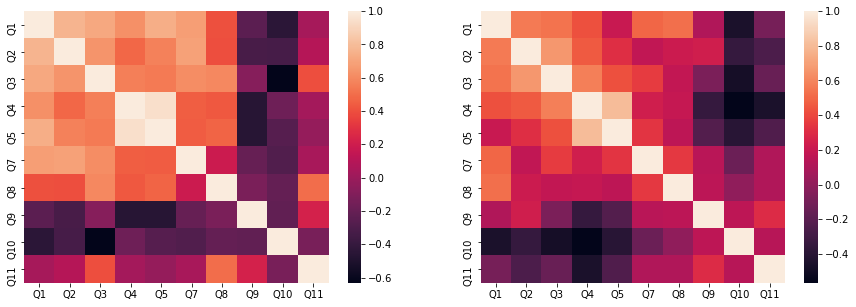

In [17]:
corr20 = df20.corr()
corr22 = df22.corr()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=[15,5])
sns.heatmap(corr20, xticklabels=corr.columns, yticklabels=corr.columns, ax=ax1)
sns.heatmap(corr22, xticklabels=corr20.columns, yticklabels=corr20.columns, ax=ax2)

In [18]:
colNames

['Q1_General background in data analysis?',
 'Q2_Hands-on experience in data analysis using Python?',
 'Q3_Experience in programming in general?',
 'Q4_General background in machine learning?',
 'Q5_Hands-on experience in running machine learning applications?',
 'Q6_Which one would you prefer on a Sunday afternoon?',
 'Q7_Hands-on experience in image analysis using satellite images?',
 'Q8_Level of interest in mathematics?',
 'Q9_Level of interest in reading?',
 'Q10_Level of stress about this class?',
 'Q11_Your overall motivation about this class?']

### Visualizing categorical variables

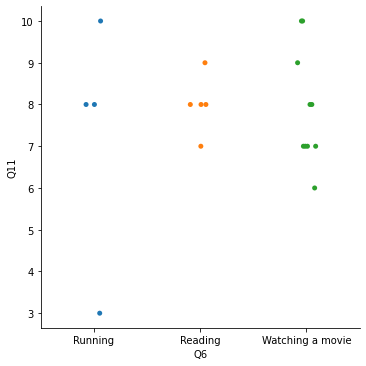

In [20]:
sns.catplot(x="Q6", y="Q11", data=df20);

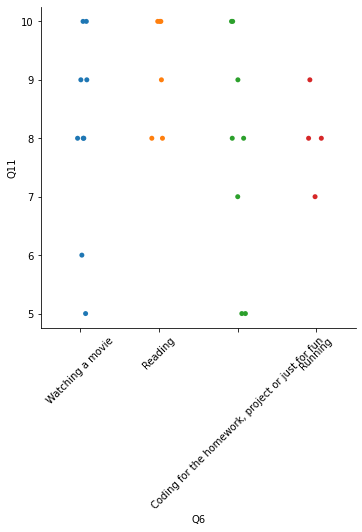

In [25]:
sns.catplot(x="Q6", y="Q11", data=df22);
plt.xticks(rotation=45);

### Handling categorical variables (Data analysis)

In [26]:
df20 = pd.get_dummies(df20, columns=['Q6'])

In [27]:
df20.head()

,Q1,Q2,Q3,Q4,Q5,Q7,Q8,Q9,Q10,Q11,Q6_Reading,Q6_Running,Q6_Watching a movie
0,8,5,4,6,7,5,3,5,7,3,0,1,0
1,8,8,5,5,6,7,7,6,7,8,1,0,0
2,6,6,6,6,5,7,7,7,7,7,0,0,1
3,5,3,6,4,4,3,8,8,5,10,0,0,1
4,6,6,5,4,3,4,5,4,10,8,1,0,0


In [28]:
df22 = pd.get_dummies(df22, columns=['Q6'])

In [87]:
df22.head()

,Q1,Q2,Q3,Q4,Q5,Q7,Q8,Q9,Q10,Q11,Q6_Reading,Q6_Running,Q6_Watching a movie
0,7,8,7,3,2,7,7,7,7,9,0,0,1
1,7,6,7,5,5,4,6,8,6,8,1,0,0
2,6,6,7,6,4,2,3,3,7,5,0,0,1
3,8,7,8,6,3,4,6,9,5,9,0,0,0
4,3,3,3,3,3,3,6,8,10,10,1,0,0


## Predictive models

#### Can we predict motivation?


In [88]:
XTr = np.array(df20.drop('Q11', axis=1))
YTr = np.array(df20.Q11)

In [89]:
XTe = np.array(df22.drop('Q11', axis=1))
YTe = np.array(df22.Q11)

#### Scale data

In [90]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [91]:
scalerSS = StandardScaler()
scalerMM = MinMaxScaler()

scalerSS.fit(XTr)
XTrNormSS = scalerSS.transform(XTr)

scalerMM.fit(XTr)
XTrNormMM = scalerMM.transform(XTr)

#### Scale data manually

In [92]:
XTrNormSSv2 = (XTr - XTr.mean(axis=0))/XTr.std(axis=0)
XTrNormMMv2 = (XTr - XTr.min(axis=0))/(XTr.max(axis=0)-XTr.min(axis=0))

#### Question: How to apply scaling on test data?

In [97]:
XTeNormSS = scalerSS.transform(XTe)

#### Question: How to apply manual scaling on test data?

## Predictive models

#### Can we predict motivation?


In [123]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt

In [94]:
XTe.shape

(27, 12)

In [132]:
mdl = SVR(kernel="linear", C=100)
#mdl = SVR(kernel="rbf")
#mdl = LogisticRegression()
#mdl = KNeighborsClassifier(n_neighbors=3)
#mdl = DecisionTreeClassifier()

clf = mdl.fit(XTrNormSS, YTr)

predYTr = clf.predict(XTrNormSS) 
predYTe = clf.predict(XTeNormSS) 

In [133]:
np.corrcoef(YTr.T, predYTr.T)

array([[1.        , 0.66541881],
       [0.66541881, 1.        ]])

In [134]:
np.corrcoef(YTe.T, predYTe.T)

array([[1.        , 0.28996726],
       [0.28996726, 1.        ]])

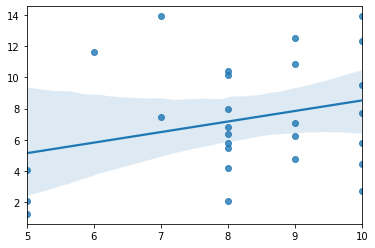

In [135]:
sns.regplot(YTe.T, predYTe.T);